In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import perceval as pcvl
import perceval.components as symb
import numpy as np
import sympy as sp

from Loop import *

fusion = pcvl.Circuit(4, name="FUSION II")

fusion.add((0,1), symb.BS.H())
fusion.add((2,3), symb.BS.H())
fusion.add((0,1), symb.PERM([1, 0]))
fusion.add((1,2), symb.PERM([1, 0]))
fusion.add((0,1), symb.PERM([1, 0]))
fusion.add((0,1), symb.BS.H())
fusion.add((2,3), symb.BS.H())

pcvl.pdisplay(fusion.U)


bsg = pcvl.Circuit(8, name = "BSG")
bsg.add((0,1), symb.BS.H())
bsg.add((2,3), symb.BS.H())
bsg.add((4,5), symb.BS.H())
bsg.add((6,7), symb.BS.H())

bsg.add((0,1), symb.BS.H(np.pi))
bsg.add((1,2), symb.BS.H(np.pi))
bsg.add((0,1), symb.BS.H(np.pi))

bsg.add((4,5), symb.BS.H(np.pi))
bsg.add((5,6), symb.BS.H(np.pi))
bsg.add((4,5), symb.BS.H(np.pi))

bsg.add((6,7), symb.BS.H())


q0 = Qbit(0, logical=False)
q1 = Qbit(2, logical=False)
q2 = Qbit(4, logical=False)
q3 = Qbit(6, logical=False)

l = Loop(circuit=bsg, photons=photons_from_qubit([q0, q1, q2, q3]), qbits=[q0, q1, q2, q3])
l.fuse2(q1, q2)

pcvl.pdisplay(l.circuit)

l.calc_in_state()


l.run(logical=False, witness=True)


[0, 1, 1, 0, 1, 0, 0, 1]
(-0.08838834764831843+0j)
[0, 1, 1, 0, 1, 0, 1, 0]
(0.08838834764831839+0j)
[1, 0, 1, 0, 1, 0, 0, 1]
(0.08838834764831842+0j)
[1, 0, 1, 0, 1, 0, 1, 0]
(0.0883883476483185+0j)


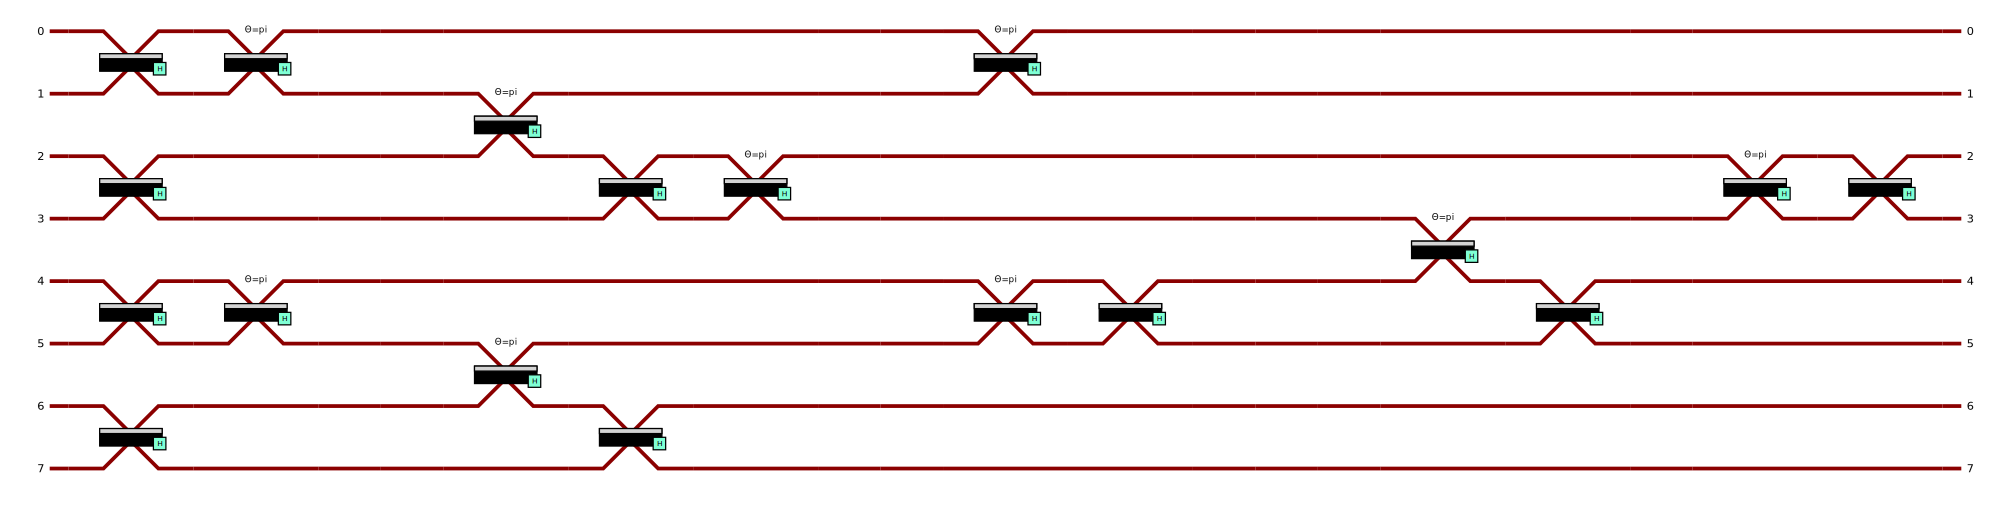

In [4]:
l.loopify()
pcvl.pdisplay(l.circuit)
